# 快速绘图
为了将matplotlib绘制的图形嵌入notebook中，需要执行下面的命令
> `%matplotlib inline`

使用inline模式在notebook中绘制的图表会自动关闭，为了在notebook的多个单元格内操作同一幅图表，需要使用一下魔法命令
> `%config InlineBackend.close_figures=False`

In [1]:
%config InlineBackend.close_figures=False

## 使用pyplot模块
在加载pyplot之后，调用figure()创建一个Figure对象，并且它将成为当前figure对象，也可不调用figure对象而直接调用接下来的plot()进行绘图。figsize参数指定图像的宽度和高度，单位是英寸。dpi参数指定Figure对象的分辨率，即每英寸所表示的像素，默认是80。

plot()的前两个参数表示x，y轴数据的对象，使用关键字参数可以指定所绘制曲线的各种属性
- label:给曲线指定一个标签，此标签会在图示中显示
- color：指定曲线的颜色，颜色可以用英文单词或者十六进制数表示
- linewidth:指定曲线的宽度，可以不是整数，也可以使用缩写形式的参数名：lw

此外还可以通过一系列函数设置当前Axes对象的各个属性：
- xlab,ylab：分别设置x,y轴的标题文字
- title：设置子图的标题
- xlim,ylim：分别设置x,y轴的显示范围
- legend：显示图示

最后调用show()函数显示图像，此外还可以调用savefig()函数将当前的Figure对象保存成图像文件。

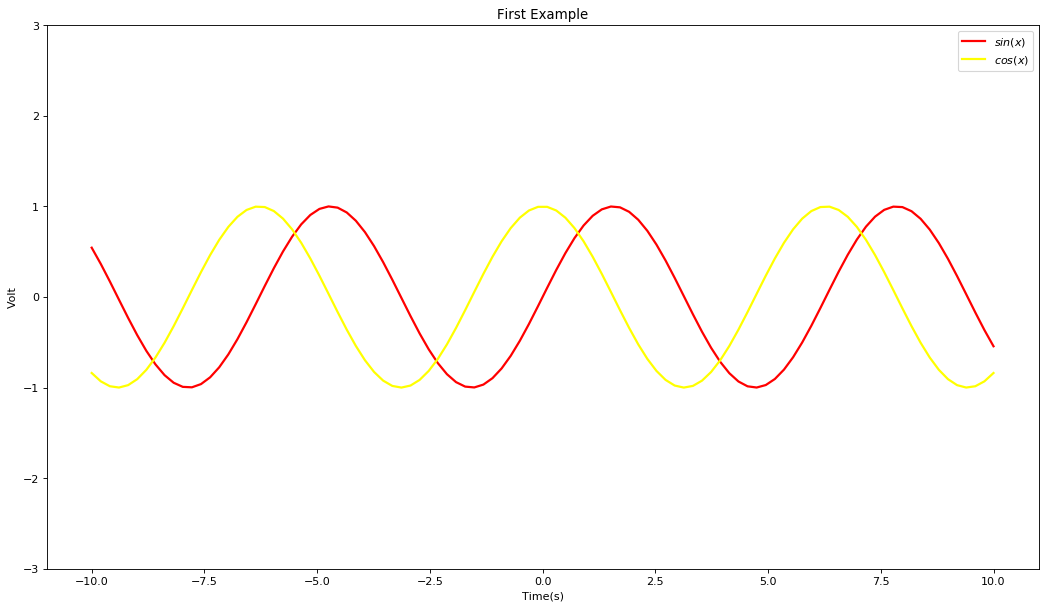

In [27]:
import matplotlib.pyplot as pl
import numpy as np

x=np.linspace(-10,10,100)
y=np.sin(x)
z=np.cos(x)
pl.figure(figsize=(16,9),dpi=80)

pl.plot(x,y,label='$sin(x)$',color='red',linewidth=2)
pl.plot(x,z,label='$cos(x)$',color='yellow',linewidth=2)

pl.xlabel("Time(s)")
pl.ylabel('Volt')
pl.title("First Example")
pl.ylim(-3,3)
pl.legend()
pl.show()

## 面对对象方式绘图
matplotlib实际上一套面对对象的绘图库，它所绘制的图表在每个绘图元素都在内存汇总有一个对象相对应。为了将面对对象的的绘图库包装成只是用函数的API，pyplot内部保存了当前图表以及当前子图等信息。可以使用gcf()和gca()获取这两个对象

Figure(432x288) AxesSubplot(0.125,0.125;0.775x0.755)


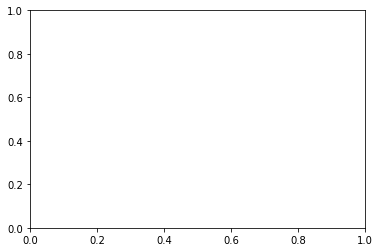

In [26]:
fig=pl.gcf()
axes=pl.gca()
print(fig,axes)

## 配置属性
matplotlib所绘制图表的每个组成部分都与一个对象对应，可以通过调用这些对象的属性设置方法set_*()或者pyplot模块的属性设置函数setp()来设置他们的属性值。

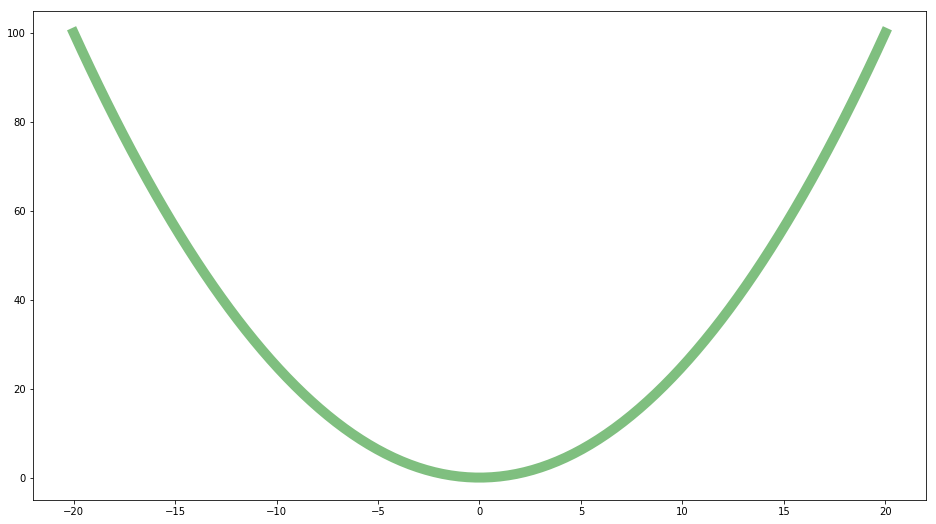

In [39]:
pl.figure(figsize=(16,9))
x=np.linspace(-20,20,100)
line=pl.plot(x,0.25*x*x)[0]#直接绘图返回一个长度为1的列表
line.set_alpha(0.5)
line.set_color('green')
line.set_linewidth(10)

调用setp()可以同时配置多个对象的属性

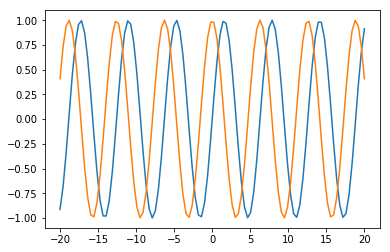

In [44]:
lines=pl.plot(x,np.sin(x),x,np.cos(x))


In [45]:
pl.setp(lines,color='r',linewidth=4)

[None, None, None, None]

同样的，可以调用Line2D对象的get_*()或者通过pl.getp()来获取对象的属性值

In [47]:
print(line.get_linewidth())
print(pl.getp(lines[0],'color'))

10.0
r


## 绘制多子图
一个figure对象可以包含多个子图（Axes），在matplotlib中用Axes对象表示一个绘图区域。可以用subplot()快速绘制包含多个子图的图表。它的调用形式如下：
> subplot(numrows,numcols,plotNum)

绘图区被等分为numRows行和numCols列，然后按照从左到右，从上到下的顺序对每个区域进行编号，左上区域的编号为1.如果三个参数都小于10，则可以缩写成一个整数

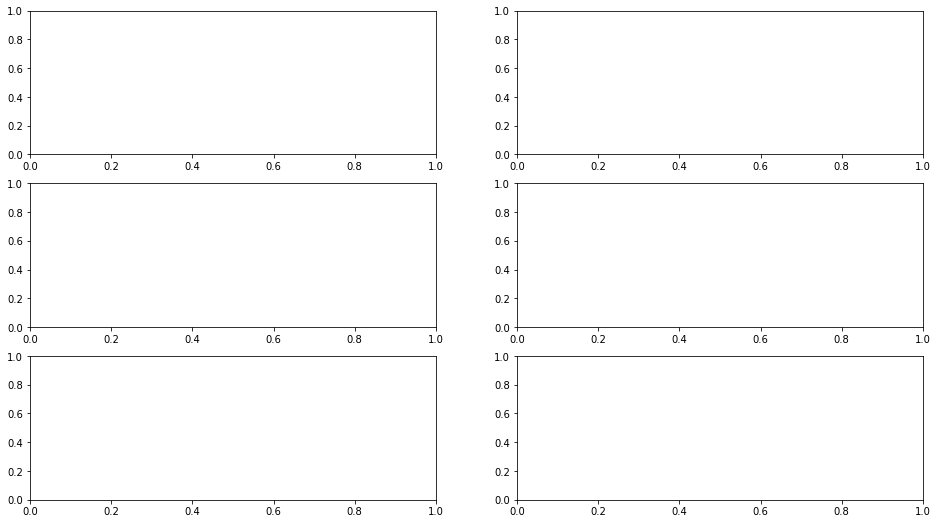

In [61]:
pl.figure(figsize=(16,9))
for idx, color in enumerate('rgbyck'):
    pl.subplot(321+idx)

subplot()返回它所创建的所有Axes对象，我们可以将这些对象用变量保存起来，然后用sca()交替让他们成为当前Axes对象，并调用plot（）在其中绘画。如果需要同时绘制多副图表，可以给figure()传递一个整数参数来指定figure对象的序号，如果序号指定的figure对象已经存在，将不创建新的对象，而只是让它变成当前的figure对象。

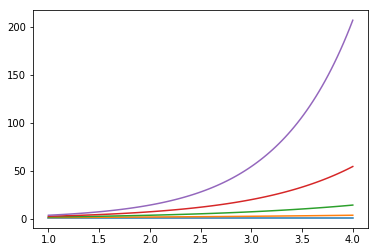

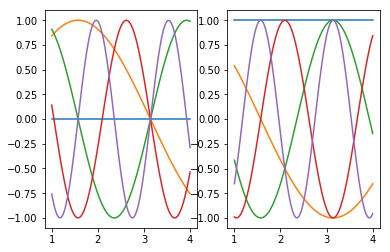

In [66]:
pl.figure(1)
pl.figure(2)
ax1=pl.subplot(121)
ax2=pl.subplot(122)
x=np.linspace(1,4,100)
for i in range(5):
    pl.figure(1) #选择图表1进行绘制
    pl.plot(x,np.exp(i*x/3))
    pl.sca(ax1) #选择图表2的子图1
    pl.plot(x,np.sin(i*x))
    pl.sca(ax2)#选择图表2进行绘制
    pl.plot(x,np.cos(i*x))

此外还可以调用subplot2grid()进行更为复杂的表格布局。其调用参数如下：
> subplot2grid(shape,loc,rowspan=1,colspan=1,**kwargs)

其中shape为表格形状的元组，loc为子图左上角所在的坐标，rowspan和colspan分别表示子图所占据的行数和列数。

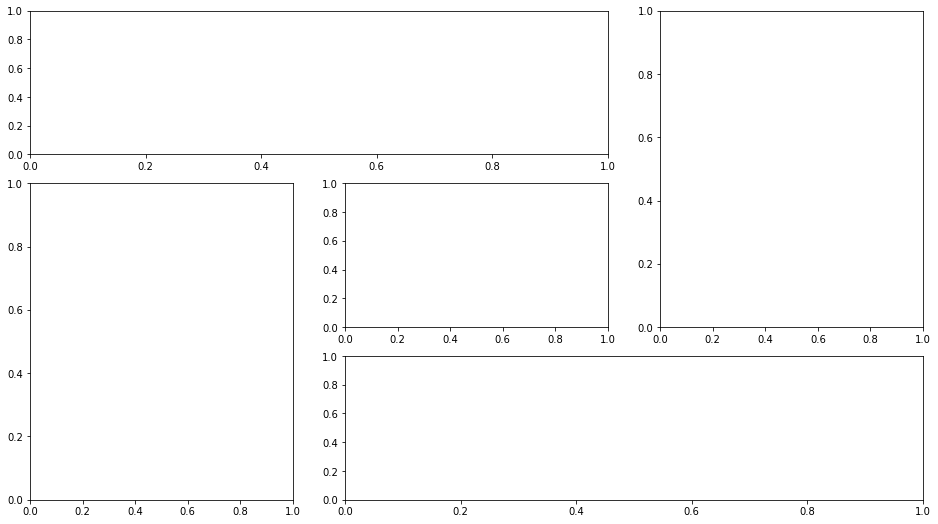

In [68]:
pl.figure(figsize=(16,9))
ax1=pl.subplot2grid((3,3),(0,0),colspan=2)
ax2=pl.subplot2grid((3,3),(0,2),rowspan=2)
ax3=pl.subplot2grid((3,3),(1,0),rowspan=2)
ax4=pl.subplot2grid((3,3),(2,1),colspan=2)
ax=pl.subplot2grid((3,3),(1,1))

## 更改显示样式

In [70]:
import matplotlib
print(matplotlib.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


更改样式

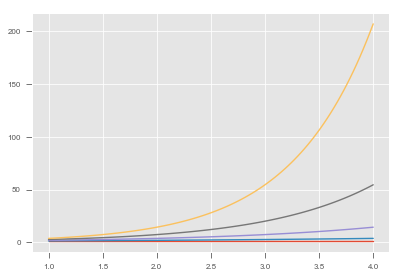

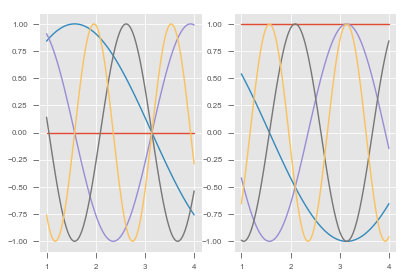

In [77]:
matplotlib.style.use('ggplot')
pl.figure(1)
pl.figure(2)
ax1=pl.subplot(121)
ax2=pl.subplot(122)
x=np.linspace(1,4,100)
for i in range(5):
    pl.figure(1) #选择图表1进行绘制
    pl.plot(x,np.exp(i*x/3))
    pl.sca(ax1) #选择图表2的子图1
    pl.plot(x,np.sin(i*x))
    pl.sca(ax2)#选择图表2进行绘制
    pl.plot(x,np.cos(i*x))

## 在图表中显示中文
matplotlib的默认配置文件中所使用的字体无法正确使用中文，可以通过以下几种方法设置中文字体：
- 在程序中直接指定字体
- 在程序开头修改配置字典rcParams
- 修改配置文件

在matplotlib中可以通过字体名指定字体，而每个字体名都与一个字体文件相对应，通过下面程序可以获得所有可用的字体

In [80]:
from matplotlib.font_manager import fontManager
fontManager.ttflist[:6]

[<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>,
 <Font 'cmb10' (cmb10.ttf) normal normal 400 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>,
 <Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>]

下面的程序使用字体列表中的字体重视中文文字

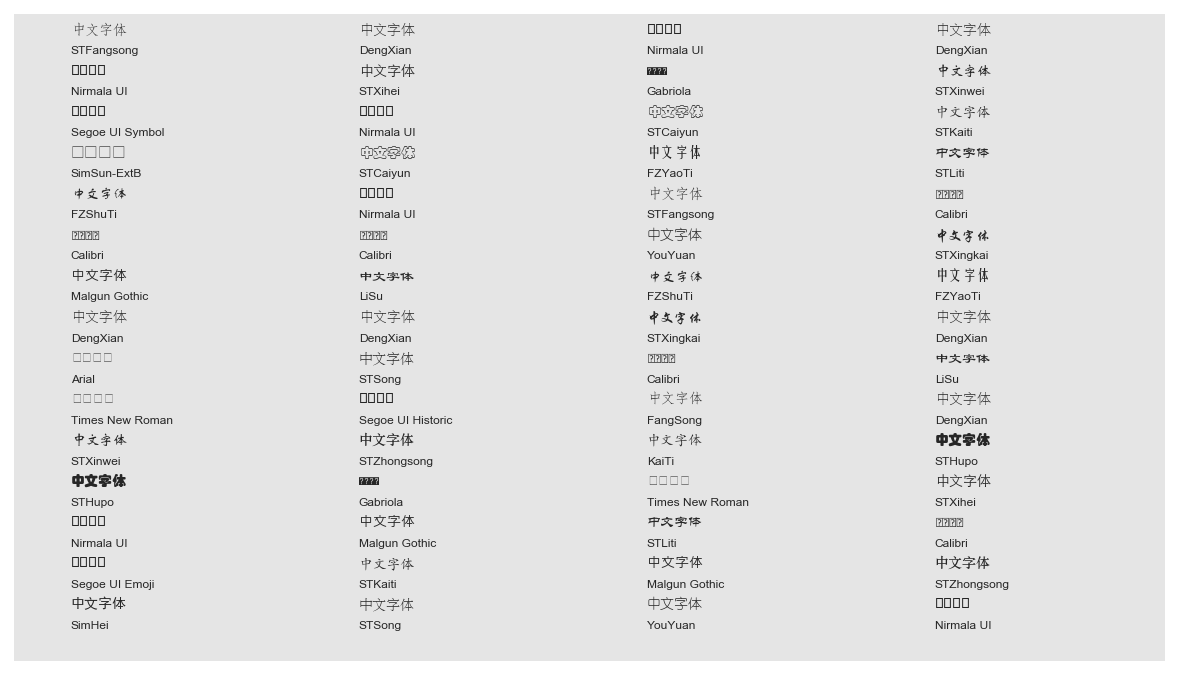

In [85]:
import os
from os import path
fig=pl.figure(figsize=(16,9))
ax=fig.add_subplot(111)
pl.subplots_adjust(0,0,1,1,0,0)
pl.xticks([])
pl.yticks([])
x,y=0.05,0.05
fonts=[font.name for font in fontManager.ttflist if path.exists(font.fname) and os.stat(font.fname).st_size>1e6]
font=set(fonts)
dy=(1.0-y)/(len(fonts)//4+(len(fonts)%4 !=0))
for font in fonts:
    t=ax.text(x,y+dy/2,u"中文字体",{'fontname':font,'fontsize':14})
    ax.text(x,y,font,{"fontsize":12})
    x+=0.25
    if x >=1.0:
        y +=dy
        x=0.05
pl.show()

Text(0.5,1,'正弦波')

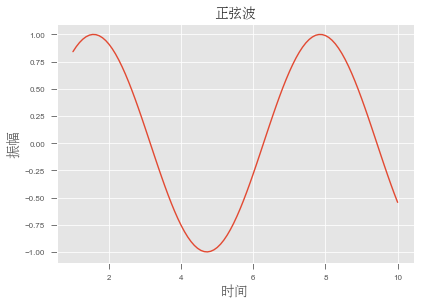

In [86]:
from matplotlib.font_manager import FontProperties
font=FontProperties(fname=r"c:\windows\fonts\simsun.ttc",size=14)
t=np.linspace(1,10,100)
y=np.sin(t)
pl.close('all')
pl.plot(t,y)
pl.xlabel(u'时间',fontproperties=font)
pl.ylabel(u'振幅',fontproperties=font)
pl.title(u'正弦波',fontproperties=font)

还可以直接修改配置字典

Text(0.5,0,'中文字体')

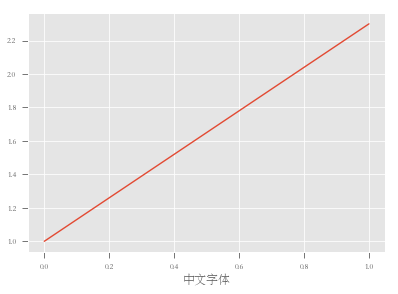

In [89]:
pl.rcParams['font.family']='STSong'
pl.plot([1,2.3])
pl.xlabel(u'中文字体')

# Artist对象
artist对象分为简单类型和容器类型两种，简单类型的artist对象是标准的绘图元件，例如line2d,rectangle,text,axesimage等，而容器类型则可以包含多个artist对象，使他们组织成一个整体，例如axis，Axes，figure等
直接使用artist对象进行绘图的流程如下：
1. 创建figure对象
2. 为figure对象创建一个或多个Axes对象
3. 调用Axes对象的方法来创建各种简单类型的artist对象

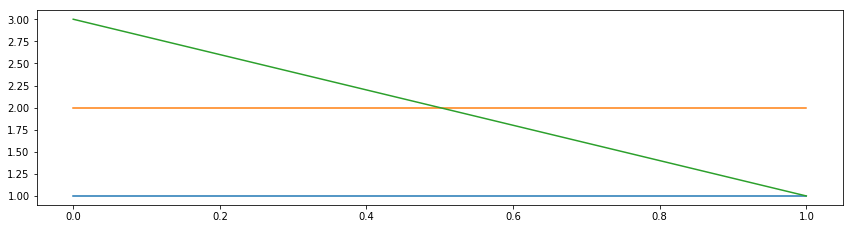

In [2]:
from matplotlib import pyplot as pl
fig=pl.figure(figsize=(16,9))
ax=fig.add_axes([0.15,0.1,0.7,0.3])
line=ax.plot(([1,2,3],[1,2,1]))[0]
pl.show()

## Artist的属性
![](http://ww1.sinaimg.cn/large/699db930ly1frytzqetk6j21c60u0wh3.jpg)
--Artist对象的所有属性都可以通过相应的set_\*()和set_\*()方法来进行读写--

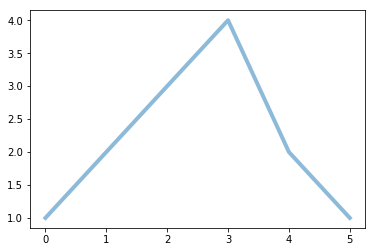

In [3]:
line=pl.plot([1,2,3,4,2,1],lw=4)[0]
line.set_alpha(0.5)
pl.show()

## Figure容器
在构成图表的各种Artist对象中，最上层的Artist对象是Figure，它包含组成图表的所有元素。当调用add_subplot()或add_axes()方法王图表添加子图时，这些子图都将添加到Axes属性列表中，同时这两个方法也返回新创建的Axes对象。add_axes()的参数是一个形如[left,bottom,width,height]的列表。这些数值分别指定所创建的Axes对象在Figure对象的位置和大小，各个值的取值范围都在0到1之间

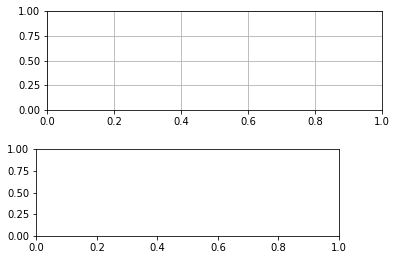

In [5]:
fig=pl.figure()
ax1=fig.add_subplot(211)
ax1.grid(True)
ax2=fig.add_axes([0.1,0.1,0.7,0.3])
pl.show()

figure对象拥有自己的文字、线条以及图像等简单类型的artist对象，默认坐标系统是以像素点为单位，但是可以通过设置artist对象的transform属性修改其所使用的坐标系。

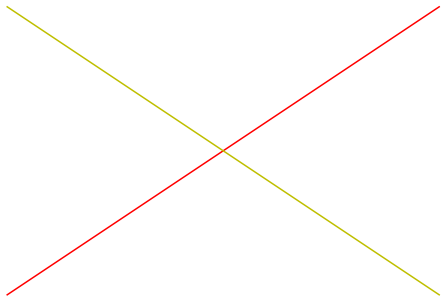

In [8]:
from matplotlib.lines import Line2D
fig=pl.figure()
line1=Line2D([0,1],[0,1],transform=fig.transFigure,figure=fig,color='r')
line2=Line2D([0,1],[1,0],transform=fig.transFigure,figure=fig,color='y')
fig.lines.extend([line1,line2])

## Axes容器
Axes容器是整个matplotlib的核心，她包含了组成图表的众多artist对象，并且有很多方法函数帮助我们创建这些对象。和figure对象一样，它有一个patch属性作为背景，当它是笛卡尔坐标系时，patch属性是一个rectangle对象；当它是极坐标时，patch属性是circle对象。

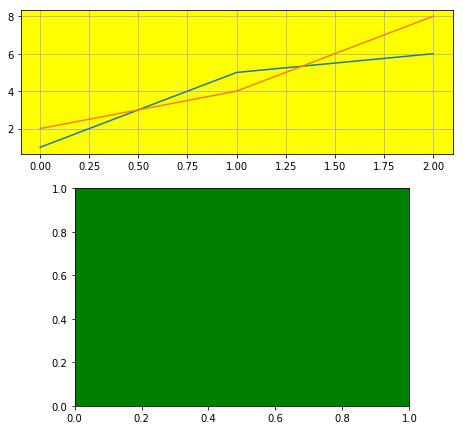

In [33]:
fig=pl.figure()
ax=fig.add_subplot(111)
ax.patch.set_facecolor('green')
ax2=fig.add_axes([0,1,1,0.5])
ax2.patch.set_color('yellow')
ax2.plot([1,5,6])
ax2.plot([2,4,8])
ax2.grid(True)
pl.show()

注意plot（）返回的是一个Line2D对象列表，因此可以传递多组X-Y轴的数据给plot（），同时绘制多组曲线。与Plot()类似，绘制柱状图的函数bar()和绘制直方统计图hist()将创建一个patch对象的列表，每个元素实际上都是懂patch类派生的rectangle对象。

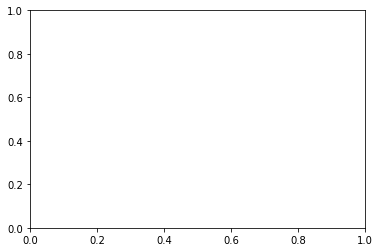

In [34]:
fig,axe=pl.subplots()
rect=pl.Rectangle((1,1),width=5,height=12)
ax.add_patch(rect)
ax.autoscale_view()
pl.show()

## Axis容器
Axis容器包括坐标轴上的刻度线、刻度文本、坐标网格以及坐标轴标题等内容。刻度包括主刻度和副刻度，分别通过get_major_ticks()和get_minor_ticks()方法获得。为了方便访问刻度线和刻度文本，Axis对象提供了 get_ticktables()和get_ticklines()方法来直接获得刻度线和刻度文本。

<a list of 8 Text major ticklabel objects>
['0.0', '0.2', '0.4', '0.6', '0.8', '1.0', '', '']


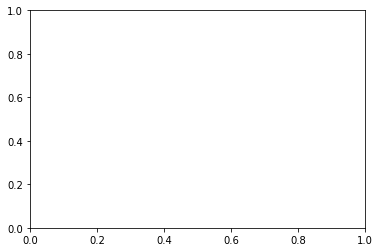

In [46]:
fig,axe=pl.subplots()
axis=ax.xaxis
axis.get_ticklocs()
print(axis.get_ticklabels())
print([x.get_text() for x in axis.get_ticklabels()])

在获得刻度线或刻度标签之后，可以设置其各种属性

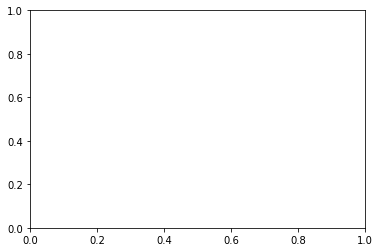

In [51]:
for label in axis.get_ticklabels():
    label.set_color('red')
    label.set_rotation(45)
    label.set_fontsize(16)
for line in axis.get_ticklines():
    line.set_color('green')
    line.set_markersize(25)
    line.set_markeredgewidth(3)
fig

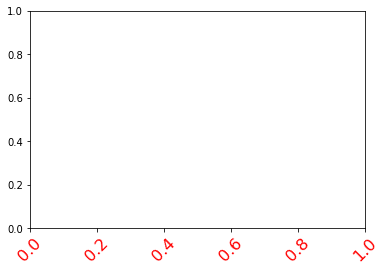

In [52]:
pl.figure()
pl.xticks(fontsize=16,color='red',rotation=45)
pl.show()

使用pl.xticks()函数能够快速调整刻度线文本，但是无法改变刻度线属性。

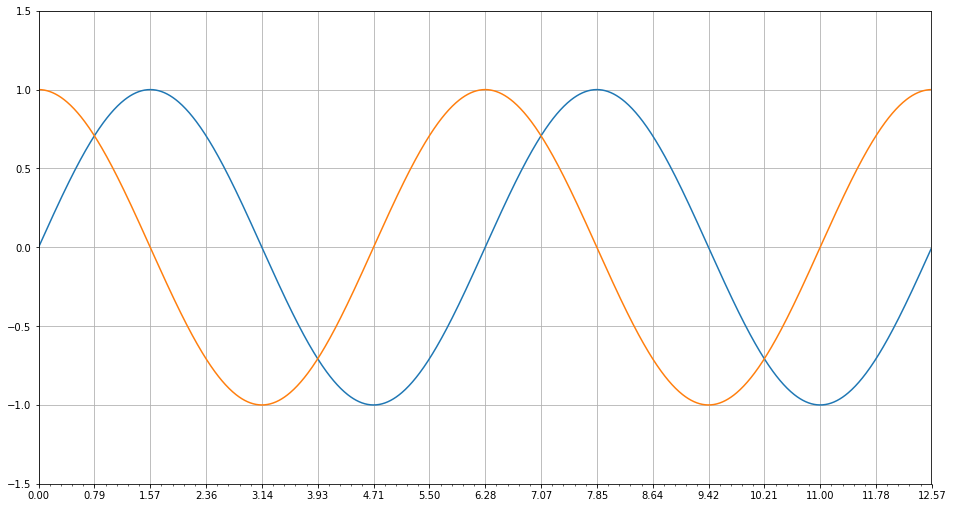

In [59]:
from fractions import Fraction
from matplotlib.ticker import MultipleLocator,FuncFormatter
import numpy as np
x=np.arange(0,4*np.pi,0.01)
fig,ax=pl.subplots(figsize=(16,9))
pl.plot(x,np.sin(x),x,np.cos(x))
def pi_formattrer(x,pos):
    frac=Fraction(int(np.round(x/(np.pi/4))),4)
    d,n=frac.denominator,frac.numerator
    if frac==0:
        return "0"
    elif frac==1:
        return '$pi$'
    elif d==1:
        return r"$\frac{\pi}{%d}$" % d
    return r"$\frac{%d \pi}{%d}$" %(n,d)
pl.ylim(-1.5,1.5)
pl.xlim(0,np.max(x))
pl.subplots_adjust(bottom=0.15)
pl.grid(True)
ax.xaxis.set_major_locator(MultipleLocator(np.pi/4))
# ax.xaxis.set_major_locator(FuncFormatter(pi_formattrer))
ax.xaxis.set_minor_locator(MultipleLocator(np.pi/20))


# 坐标变换与注释


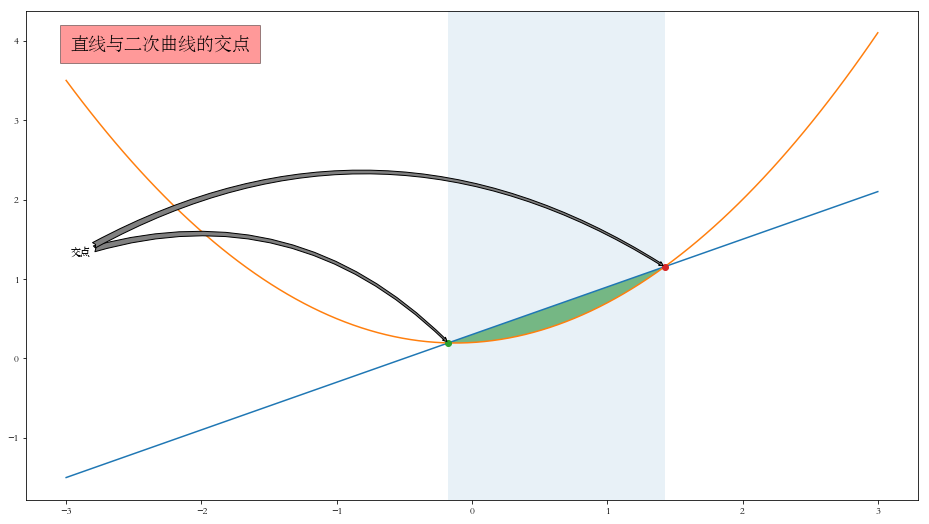

In [67]:
def func1(x):
    return 0.6*x+0.3
def func2(x):
    return 0.4*x**2+0.1*x+0.2
def find_curve_intersects(x,y1,y2):
    d=y1-y2
    idx=np.where(d[:-1]*d[1:]<=0)[0]
    x1,x2=x[idx],x[idx+1]
    d1,d2=d[idx],d[idx+1]
    return -d1*(x2-x1)/(d2-d1)+x1

pl.rcParams['font.family']='STSong'
x=np.linspace(-3,3,100)
f1=func1(x)
f2=func2(x)
fig,ax=pl.subplots(figsize=(16,9))
ax.plot(x,f1)
ax.plot(x,f2)

x1,x2=find_curve_intersects(x,f1,f2)
ax.plot(x1,func1(x1),'o')
ax.plot(x2,func2(x2),'o')

ax.fill_between(x,f1,f2,where=f2<f1,facecolor='green',alpha=0.5)

from matplotlib import transforms
trans=transforms.blended_transform_factory(ax.transData,ax.transAxes)
ax.fill_between([x1,x2],0,1,transform=trans,alpha=0.1)

a=ax.text(0.05,0.95,u"直线与二次曲线的交点",transform=ax.transAxes,verticalalignment='top',fontsize=18,bbox={'facecolor':'red',"alpha":0.4,'pad':10})
arrow={'arrowstyle':'fancy,tail_width=0.6',
       "facecolor":'gray',
       "connectionstyle":"arc3,rad=-0.3"
      }
ax.annotate(u"交点",xy=(x1,func1(x1)),xycoords='data',
           xytext=(0.05,0.5),textcoords='axes fraction',
           arrowprops=arrow)
ax.annotate(u"交点",xy=(x2,func1(x2)),xycoords='data',
           xytext=(0.05,0.5),textcoords='axes fraction',
           arrowprops=arrow)
xm=(x1+x2)/2
ym=(func1(xm)-func2(xm))/2+func2(xm)

## 4种坐标系
- 数据坐标系：它是描述数据空间中位置的坐标系
- 子图坐标系：描述子图中位置的坐标系，子图的左下角坐标为（0,0），右上角坐标为（1,1）
- 图表坐标系：一幅图表可以包含多个子图，并且子图周围都有一定的余白，因此还需要用图表坐标系描述图表显示区域中的某个点。图表的左下角坐标为（0,0），右上角坐标为（1,1）
- 窗口坐标系：它是绘图窗口中以像素为单位的坐标系。左下角坐标为（0,0），右上角坐标为（width，height）
Axe对象的transData属性是数据坐标变换对象，transAxes属性是子图坐标变换对象。figure对象的transFigure属性是图表坐标变换对象

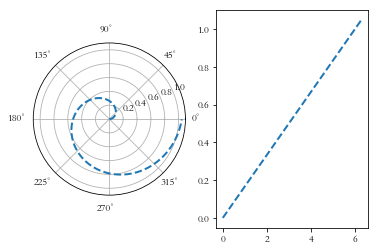

In [70]:
import matplotlib.pyplot as pl
theta=np.arange(0,2*np.pi,0.02)
ax1 = pl.subplot(121, projection='polar')
ax2 = pl.subplot(122)
ax1.plot(theta,theta/6,'--',lw=2)
ax2.plot(theta,theta/6,'--',lw=2)
pl.show()

## 添加注释
在pyplot中提供了两个绘制文字的函数，text()和figtext()。它们分别调用当前Axes对象和当前figure对象的text()方法进行绘图。text()默认在数据坐标系中添加文字，figtext()则默认在图表坐标系中添加文字。可以通过transform参数改变文字所在的坐标系

Text(0.1,0.92,'图表坐标系中的文字')

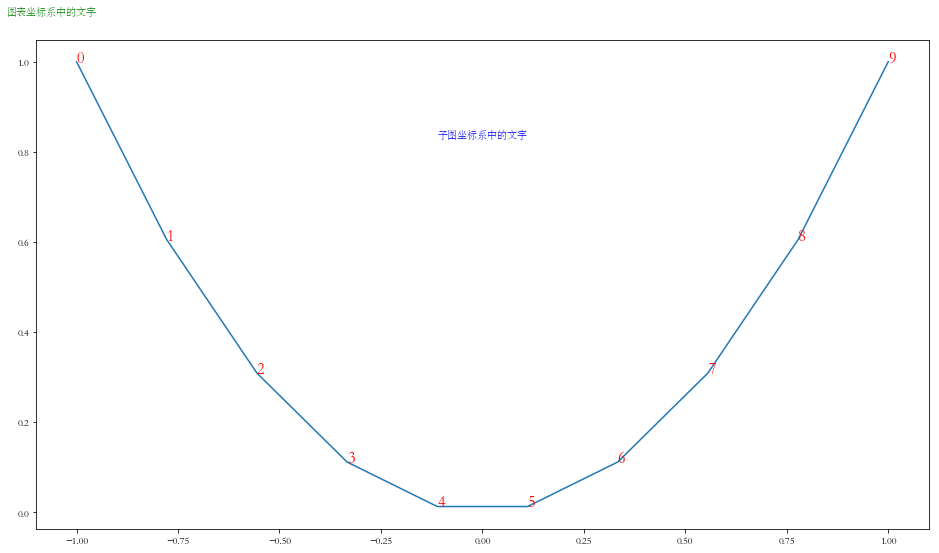

In [74]:
x=np.linspace(-1.,1,10)
y=x**2

fig,ax=pl.subplots(figsize=(16,9))
ax.plot(x,y)
for i,(_x,_y) in enumerate(zip(x,y)):
    ax.text(_x,_y,str(i),color='red',fontsize=16)
ax.text(0.5,0.8,u'子图坐标系中的文字',color='blue',ha='center',transform=ax.transAxes)
pl.figtext(0.1,0.92,u"图表坐标系中的文字",color='green')

通过pyplot模块的annotate()绘制带箭头的注释文字，其调用参数如下：
> annotate(s,xy,xytext=Noze,xycoords='data',textcoords='data',arrowprops=None,.....)

其中s是注释文本，xy是箭头所指处的坐标，xytext是注释文本所在的坐标，xycoords和textcoords分别指定箭头坐标和注释文本坐标的变换方式。它们有以下几种选项
![](http://ww1.sinaimg.cn/large/699db930ly1frz7s0tk77j23281uphdu.jpg)

# 绘图函数
## 对数坐标图
绘制对数坐标图的函数有三个：semilogx(),semilogy(),loglog()。它们分别对x轴，y轴或者两轴绘制对数坐标

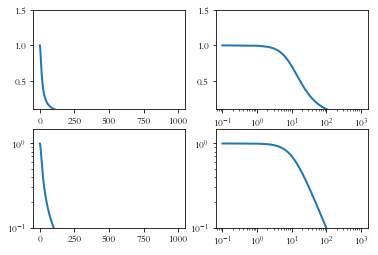

In [81]:
w=np.linspace(0.1,1000,1000)
p=np.abs(1/(1+0.1j*w))

fig,axes=pl.subplots(2,2)
functions=('plot','semilogx','semilogy','loglog')
for ax,fname in zip(axes.ravel(),functions):
    func=getattr(ax,fname)
    func(w,p,lw=2)
    ax.set_ylim(0.1,1.5)

## 极坐标图

(<a list of 4 Line2D thetagridline objects>,
 <a list of 2 Text thetagridlabel objects>)

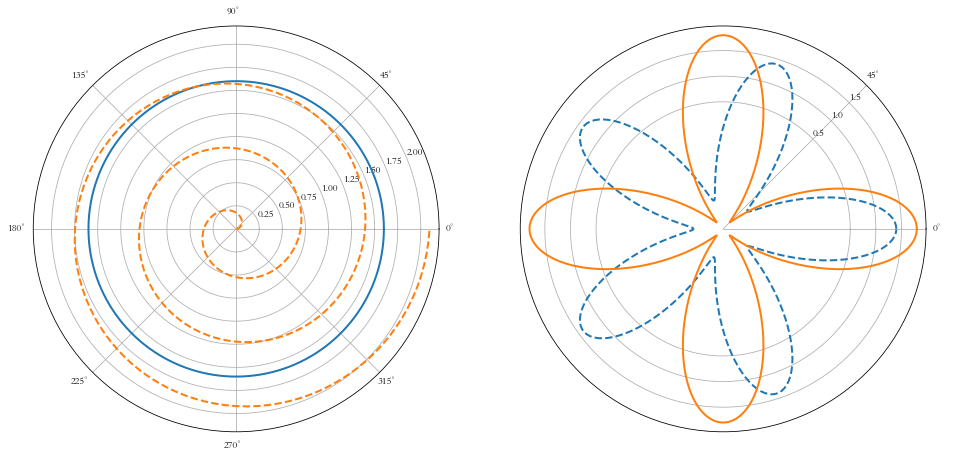

In [83]:
pl.figure(figsize=(16,9))
theta=np.arange(0,2*np.pi,0.02)
pl.subplot(121,polar=True)
pl.plot(theta,1.6*np.ones_like(theta),lw=2)
pl.plot(3*theta,theta/3,'--',lw=2)

pl.subplot(122,polar=True)
pl.plot(theta,1.4*np.cos(5*theta),'--',lw=2)
pl.plot(theta,1.8*np.cos(4*theta),lw=2)
pl.rgrids(np.arange(0.5,2,0.5),angle=45)
pl.thetagrids([0,45])

- **调用subplot()绘制子图时通过设置polar参数为TRUE，创建一个极坐标子图，然后调用plot（）在极坐标中绘图**
- **rgrids()设置同心圆栅格的半径大小和文字标注的角度**
- **thetagrids()设置放射线栅格的角度**


## 柱状图

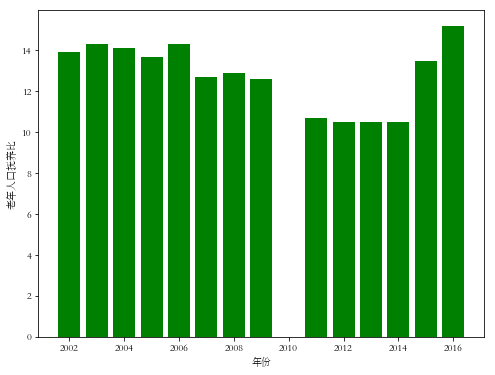

In [105]:
import pandas as pd
data=pd.read_csv('data.txt',header=None)
pl.figure(figsize=(8,6))
pl.bar(data[0],data[1],color='green')
pl.xlabel('年份')
pl.ylabel('老年人口抚养比')
pl.show()

## 散列图
使用plot绘图时，如果指定样式参数为只绘制数据点，那么所绘制的就是一幅散列图。但是这种方法没办法指定颜色和大小，scatter()所绘制的散列图可以指定每个点的颜色和大小

(0, 1)

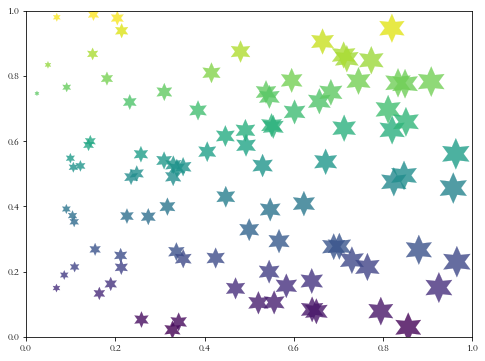

In [109]:
pl.figure(figsize=(8,6))
x=np.random.random(100)
y=np.random.random(100)
pl.scatter(x,y,s=x*1000,c=y,marker=(6,1),alpha=0.8,lw=0.2,
          facecolor='none')
pl.xlim(0,1)
pl.ylim(0,1)

scatter()的前两个参数是数组
- **s参数指定点的大小，其值与点的面积成正比，可以是单个数值或者数组**
- **c参数指定每个点的颜色，可以是数值或者数组。**
- **marker参数设置点的形状，可以是一个表示形状的字符串，也可是表示多边形的两个元素的元组，第一个元素表示多边形的边数，第二个元素表示多边形的样式，取值范围为0,1,2,3,其中0表示多边形，1表示星形，2表示放射形，3表示忽略变数显示为圆形**

## 等值线图
所谓等值线，是指由函数值相等的个点连城的平滑曲线。等值线可以直观的表示出二元函数值的变化的趋势。matplotlib中还可以使用contour()和contourf()绘制等值线，区别在于contourf()所得到的是带填充效果的等值线。

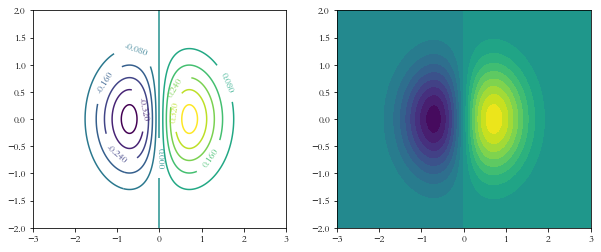

In [110]:
y,x=np.ogrid[-2:2:200j,-3:3:300j]
z=x*np.exp(-x**2-y**2)
extent=[np.min(x),np.max(x),np.min(y),np.max(y)]
pl.figure(figsize=(10,4))
pl.subplot(121)
cs=pl.contour(z,10,extent=extent)
pl.clabel(cs)
pl.subplot(122)
pl.contourf(x.reshape(-1),y.reshape(-1),z,20)

## 三维绘图

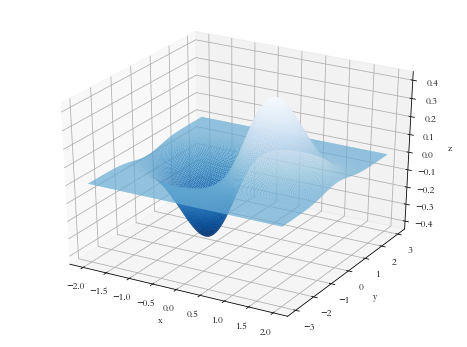

In [112]:
import mpl_toolkits.mplot3d
x,y=np.ogrid[-2:2:200j,-3:3:200j]
z=x*np.exp(-x**2-y**2)

pl.figure(figsize=(8,6))
ax=pl.subplot(111,projection='3d')
ax.plot_surface(x,y,z,rstride=2,cstride=1,cmap=pl.cm.Blues_r)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel('z')
pl.show()

- 在当前图表中创建一个子图，通过projection参数指定子图的投影模式为“3d”，这样subplot将返回一个用于三维绘图的Axes3D子图对象
- 调用Axe3D对象的plot_surface()绘制三维曲面，rstrid和cstride分别是数组第0轴和第1轴的下标间隔，对于很大的数组，可以选取较大的间隔，提升绘画速度

# matplotlib技巧集
## 响应鼠标和键盘事件
界面事件的绑定都是通过Figure.canvas.mpl_connect()进行的，它的第一个参数为事件名，第二个参数为时间响应函数，当指定的时间发生时，将调用指定的函数。为了在Notebook中执行本节代码，需要启动GUI时间处理线程，需要执行``%gui qt %matplotlib qt``语句
### 键盘事件

5

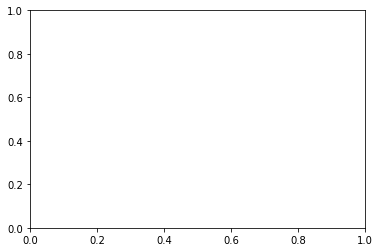

In [10]:
%gui qt
%matplotlib qt
%matplotlib inline
import matplotlib.pyplot as pl
import sys
fig,ax=pl.subplots()
def on_key_press(event):
    print(event.key)
    sys.stdout.flush()
fig.canvas.mpl_connect('key_press_event',on_key_press)

可以通过mpl_connect的帮助文档查看所有的事件名称。
![](http://ww1.sinaimg.cn/large/699db930ly1fs0cno0hyij23281s84qq.jpg)
![](http://ww1.sinaimg.cn/large/699db930ly1fs0cv9e3lkj22ao0w04ic.jpg)

In [8]:
for key,funcs in fig.canvas.callbacks.callbacks.items():
    print(key)
    for cid,wrap in sorted(funcs.items()):
        func=wrap.func
        print("{0}:{1}.{2}".format(cid,func.__module__,func))

button_press_event
1:matplotlib.backend_bases.<function FigureCanvasBase.pick at 0x0000017F1C9CF730>
scroll_event
2:matplotlib.backend_bases.<function FigureCanvasBase.pick at 0x0000017F1C9CF730>
key_press_event
3:matplotlib.backend_bases.<function FigureManagerBase.key_press at 0x0000017F1C9D41E0>
5:__main__.<function on_key_press at 0x0000017F27C23F28>


5

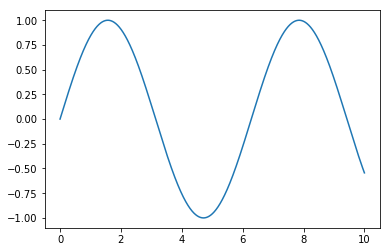

In [19]:
%gui qt
%matplotlib qt
%matplotlib inline
import numpy as np
fig,ax=pl.subplots()
x=np.linspace(0,10,10000)
line,=ax.plot(x,np.sin(x))
def on_key_press(event):
    if event.key in "rgbcmyk":
        line.set_color(event.key)
    fig.canvas_draw_idle()
fig.canvas.mpl_disconnect(fig.canvas.manager.key_press_handler_id)
fig.canvas.mpl_connect('key_press_event',on_key_press)

5

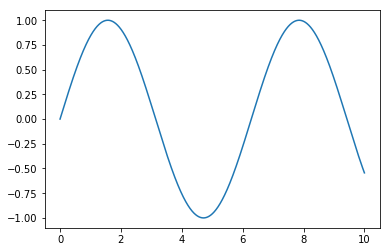

In [17]:
import numpy as np
fig,ax=pl.subplots()
x=np.linspace(0,10,10000)
line,=ax.plot(x,np.sin(x))
def on_key_press(event):
    if event.key in "rgbcmyk":
        line.set_color(event.key)
    fig.canvas_draw_idle()
fig.canvas.mpl_disconnect(fig.canvas.manager.key_press_handler_id)
fig.canvas.mpl_connect('key_press_event',on_key_press)

###  鼠标事件
当鼠标在子图范围内产生动作时，将触发鼠标事件，鼠标事件分为三种：
- botton_press_event:鼠标按下时触发
- botton_release_event: 鼠标释放时触发
- button_notify_event:时间移动时触发
鼠标事件的相关信息可以通过event对象的属性获得：
- name:事件名
- button： 鼠标按键，1,2,3表示左中右按键，None表示没有按键
- x,y：表示鼠标在图表中的像素坐标
- xdata,ydata：鼠标在数据坐标系的坐标

7

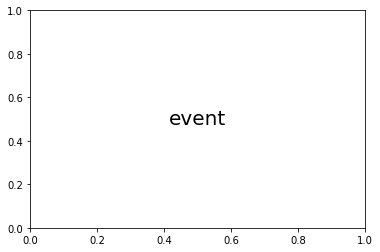

In [20]:
fig,ax=pl.subplots()
text=ax.text(0.5,0.5,'event',ha='center',va='center',fontdict={'size':20})
def on_mouse(event):
    global e
    e=event
    info="{}\nbutton:{}\nFig x,y:{},{}\nData x,y:{:3.2f},{:3.2f}".format(event.name.event.button,event.x,event.y,event.xdata,event.ydata)
    text.set_text(info)
    fig.canvas.draw()
fig.canvas.mpl_connect("button_press_event",on_mouse)
fig.canvas.mpl_connect('button_release_event',on_mouse)
fig.canvas.mpl_connect("button_notify_event",on_mouse)

### 实时高亮显示

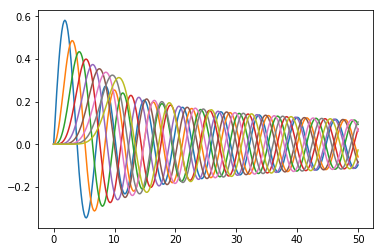

In [26]:
class CurveHighLighter(object):
    def __init__(self,ax,alpha=0.3,linewidth=3):
        self.ax=ax
        self.alpha=alpha
        self.linewidth=3
        ax.figure.canvas.mpl_connect('motion_notify_event',self.on_move)
    def highlight(self,target):
        need_redraw=False
        if target is None:
            for line in self.ax.lines:
                line.set_alpha(1.0)
                if line.get_linewidth() != 1.0:
                    line.set_linewidth(1.0)
                    need_redraw=True
                else:
                    for line in self.ax.lines:
                        lw=self.linewidth if line is target else 1
                        if line .get_linewidth() !=lw:
                            line.set_linewidth(lw)
                            need_redraw=True
                        alpha =1.0 if lw==self.linewidth else self.alpha
                        line.set_alpha(alpha)
                if need_redraw ==True:
                    self.ax.figure.canvas.draw_idle()
    def on_move(self,evt):
        ax=self.ax
        for line in ax.lines:
            if line.contains(evt)[0]:
                self.highlight(line)
                break
            else:
                self.highlight(None)
fig,ax=pl.subplots()
x=np.linspace(0,50,300)
from scipy.special import jn
for i in range(1,10):
    ax.plot(x,jn(i,x))
ch=CurveHighLighter(ax)